In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [28]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg', 0)


In [29]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [30]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

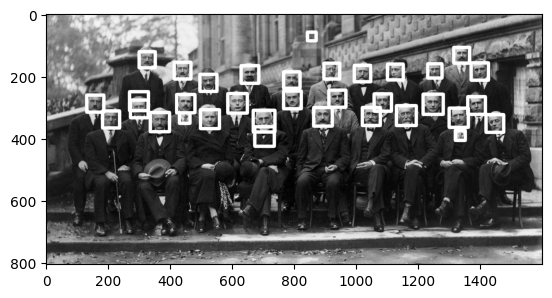

In [31]:
result = detect_face(solvay)
plt.imshow(result, 'gray')

In [32]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, 1.2, 5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

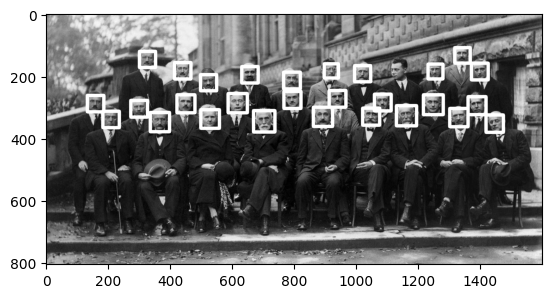

In [33]:
result = adjusted_detect_face(solvay)
plt.imshow(result, 'gray')

In [34]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [35]:
def detect_eyes(img):
    face_img = img.copy()
    face_rects = eye_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

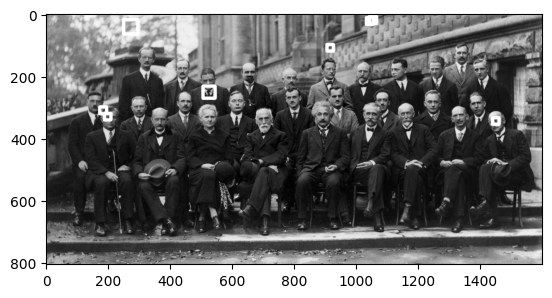

In [36]:
result = detect_eyes(solvay)
plt.imshow(result, 'gray')

In [37]:
cap = cv2.VideoCapture(0)

In [38]:
while True:
    ret, frame = cap.read(0)
    
    frame= detect_face(frame)
    
    cv2.imshow('Face', frame)
    
    k= cv2.waitKey(1)
    
    if k == 27:
        break
    
cap.release()
cv2.destroyAllWindows()